## Initial position and velocity of Star 2 ##

For a system of two masses, the center of mass is given by
$$ R_c = \frac{m_1 \cdot r_1 + m_2 \cdot r_2}{m_1 + m_2} $$
In this situation, we are given that the center of mass ($R_c$) is at (0,0), and we want to find $r_2$.
Since $r_1$ only differs from the origin in the x position, we don't have to worry about two dimensions.
Rearranging our equation to find $r_2$ gives us
$$ r_2 = \frac{R_c \cdot (m_1 + m_2) - m_1 \cdot r_1}{m_2} $$
Plugging in values to our equation, we get that
$$ r_2 = \frac{0 \cdot (2 \cdot 10^{30} + 4 \cdot 10^{30}) -2 \cdot 10^{30} \cdot 1.5 \cdot 10^{11}}{4 \cdot 10^{30}} $$
$$ r_2 = \frac{-2 \cdot 10^{30} \cdot 1.5 \cdot 10^{11}}{4 \cdot 10^{30}} $$
$$ r_2 = \frac{-1.5 \cdot 10^{11}}{2} $$
$$ r_2 = -7.5 \cdot 10^{10} $$

It's a similar story for velocity. The center of mass velocity is given by
$$ V_c = \frac{m_1 \cdot v_1 + m_2 \cdot v_2}{m_1 + m_2} $$
Just like with the center of mass, the velocity only points in one direction, so we don't need to worry about two mentions
Rearranging our equation to find $v_2$ gives us
$$ v_2 = \frac{V_c \cdot (m_1 + m_2) - m_1 \cdot v_1}{m_2} $$
Plugging in values to our equation, we get that
$$ v_2 = \frac{0 \cdot (2 \cdot 10^{30} + 4 \cdot 10^{30}) -2 \cdot 10^{30} \cdot 3.3 \cdot 10^4}{4 \cdot 10^{30}} $$
$$ v_2 = \frac{-2 \cdot 10^{30} \cdot 3.3 \cdot 10^4}{4 \cdot 10^{30}} $$
$$ v_2 = \frac{-3.3 \cdot 10^4}{2} $$
$$ v_2 = -1.65 \cdot 10^4 $$


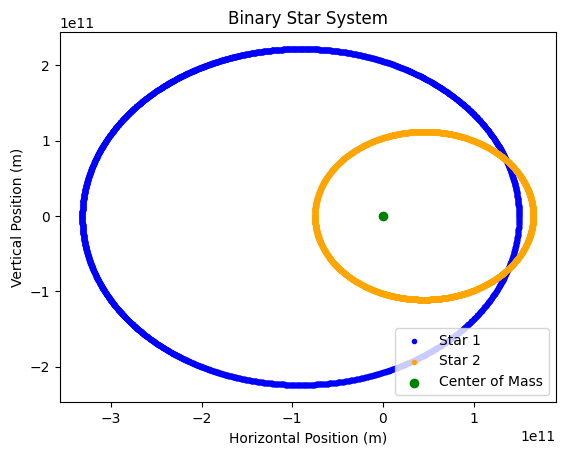

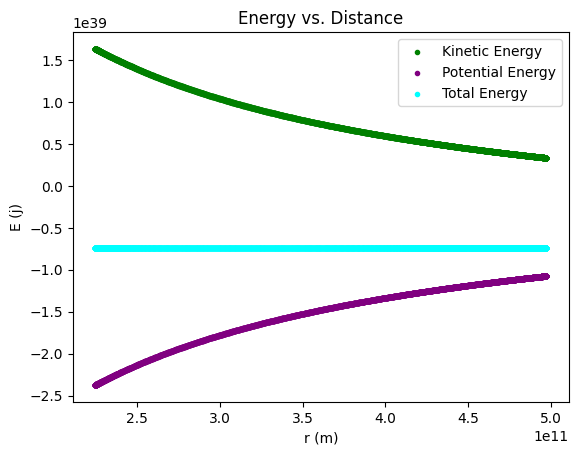

In [17]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np

# declare constants
m1 = 2E+30 # Mass of the first star, in kg
m2 = 2 * m1 # Mass of the second star
r1 = np.array([1.5E+11, 0]) # position of the first star
v1 = np.array([0, 3.3E+4])

# center of mass should be at the center, and center of velocity should be zero
r2 = np.array([-7.5E+10, 0]) # position of the first star
v2 = np.array([0, -1.65E+4])

G = 6.6738E-11 # Nm^2/kg^2, gravitational constant

# force of gravity
def gravity(r1, m1, r2, m2):
    r = r2 - r1 # distance between the masses
    rmag = np.linalg.norm(r) # magnitude of distance
    rhat = r / rmag # unit vector of distance

    F_g = G * m1 * m2 / (rmag ** 2) * rhat # Force of gravity
    return F_g

daysecs = 86400 # number of seconds in a day
t = 0 # initial time 
dt = daysecs / 2 # each time step will be half a day

# kinetic energy of the system is just the KE of the masses
klist = [0.5 * (m1 * np.linalg.norm(v1) ** 2 + m2 * np.linalg.norm(v2) ** 2)]

rlist = [np.abs(np.linalg.norm(r1 - r2))]

# potential energy of the system is just the PE of the masses
plist = [-G * m1 * m2 / rlist[0]]

# total energy = KE + PE 
elist = [klist[0] + plist[0]]

# create other lists
x1list = [r1[0]] # m
y1list = [r1[1]] # m
x2list = [r2[0]] # m
y2list = [r2[1]] # m

tlist = [t] # s

# simulate the stars for 5 earth years
while t < daysecs * 365 * 5:
    # caluclate the graviational force on the first star
    F_g1 = gravity(r1, m1, r2, m2)
    a1 = F_g1 / m1 # F = ma, so a = F/m
    v1 = v1 + a1 * dt # update velocity
    r1 = r1 + v1 * dt # update position

    F_g2 = -F_g1 # by Newton's third law, the force on the second star is just the opposite of the force on the second star
    a2 = F_g2 / m2 # F = ma, so a = F/m
    v2 = v2 + a2 * dt # update velocity
    r2 = r2 + v2 * dt # update position

    t += dt # update time

    ke = 0.5 * (m1 * np.linalg.norm(v1) ** 2 + m2 * np.linalg.norm(v2) ** 2) # Ke = 1/2 * m * v^2
    r = np.linalg.norm(r1 - r2) # Calculate r as the magnitude of the distance between the stars
    pe = -G * m1 * m2 / r # PE for point masses = -G * m1 * m2 / r

    # update lists
    klist.append(ke)
    plist.append(pe)
    elist.append(ke + pe)

    rlist.append(r)

    x1list.append(r1[0])
    y1list.append(r1[1])
    x2list.append(r2[0])
    y2list.append(r2[1])

    tlist.append(t)

# graphs!
plt.scatter(x1list, y1list, color="blue", label="Star 1", linewidths=1, marker=".") # plot the first star
plt.scatter(x2list, y2list, color="orange", label="Star 2", linewidths=1, marker=".") # plot the second star
plt.scatter([0], [0], color="green", label="Center of Mass") # label the center of mass (0,0)
plt.title("Binary Star System") # title the graph
plt.xlabel("Horizontal Position (m)") # label the x-axis
plt.ylabel("Vertical Position (m)") # label the y-axis
plt.legend() # auto-generate a legend

plt.show() # show the plot

plt.scatter(rlist, klist, color="green", label="Kinetic Energy", linewidths=1, marker=".") # plot the kinetic energy
plt.scatter(rlist, plist, color="purple", label="Potential Energy", linewidths=1, marker=".") # plot the potential energy
plt.scatter(rlist, elist, color="cyan", label="Total Energy", linewidths=1, marker=".") # plot the total energy
plt.title("Energy vs. Distance") # title the graph
plt.xlabel("r (m)") # label the x-axis
plt.ylabel("E (j)") # label the y-axis
plt.legend() # auto-generate a legend

plt.show() # show the plot
